In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 

In [ ]:
df = pd.read_csv("movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
df.isnull().any()

color                         True
director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                  True
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
movie_imdb_link              False
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                   False
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [ ]:
df.fillna(value=0, axis=1, inplace=True)

In [ ]:
df.shape

(5043, 28)

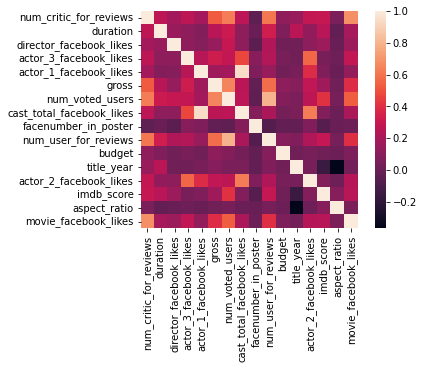

In [ ]:
sns.heatmap(df.corr(), vmax=1 ,square=True)

In [ ]:
features = ['actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'aspect_ratio',
       'movie_facebook_likes']
target = ['imdb_score']

In [ ]:
train, test = train_test_split(df,test_size=0.30)
train.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1786,Color,Michael Ritchie,21.0,89.0,23.0,899.0,Francis Capra,1000.0,8119205.0,Comedy|Family|Fantasy,...,21.0,English,USA,PG,28000000.0,1997.0,937.0,5.4,1.85,517
2269,Color,Nimród Antal,107.0,88.0,190.0,163.0,Fred Ward,137000.0,15988876.0,Action|Crime|Thriller,...,110.0,English,USA,PG-13,27000000.0,2009.0,459.0,5.7,2.35,0
1023,Color,0,28.0,43.0,0.0,600.0,Tony Curran,3000.0,0.0,Action|Drama|Sci-Fi,...,149.0,English,USA,TV-MA,0.0,0.0,845.0,7.0,1.78,0
780,Color,Robert Lorenz,239.0,111.0,39.0,461.0,Ed Lauter,16000.0,35754555.0,Drama|Sport,...,150.0,English,USA,PG-13,0.0,2012.0,897.0,6.8,2.35,11000
35,Color,Dan Scanlon,376.0,104.0,37.0,760.0,Tyler Labine,12000.0,268488329.0,Adventure|Animation|Comedy|Family|Fantasy,...,265.0,English,USA,G,200000000.0,2013.0,779.0,7.3,1.85,44000


In [ ]:
#Fill the training and test data with require information
X_train = train[features].dropna()
y_train = train[target].dropna()
X_test = test[features].dropna()
y_test = test[target].dropna()

In [ ]:
from sklearn import linear_model
from sklearn import metrics 
lin = linear_model.LinearRegression()

lin.fit(X_train, y_train)

LinearRegression()

In [ ]:
lin_score_train = lin.score(X_test, y_test)
lin_score_test = lin.score(X_train, y_train)


In [ ]:
print("Training score: ",lin_score_train)
print("Testing score: ",lin_score_test)

Training score:  0.18760410880989298
Testing score:  0.23287520187540411
